In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime

import matplotlib.pyplot as plt
from matplotlib import dates
from sandpyper.volumetrics import (new_get_state_vol_table, new_get_transects_vol_table,
                                   new_plot_alongshore_change, plot_mec_evolution)

In [10]:
# Load dh dataset
dh_path=r"C:\my_packages\doc_data\profiles\dh_data.csv"

# limit of detection table
#lod_table_path="C:\\jupyter\\tables\\final_tables\\lod_final\\lod_table_final_v2_apocorr.csv"

sand_pts=pd.read_csv(dh_path)
#lod_table=pd.read_csv(lod_table_path)

sand_pts.head()

,geometry,location,tr_id,distance,dt,date_pre,date_post,z_pre,z_post,dh
0,POINT (299901.7782793006 5773692.070767866),leo,69,26.8,dt_5,2019-03-28,2019-07-31,0.223866,0.112838,-0.111029
1,POINT (299901.4828779417 5773692.018441608),leo,69,27.1,dt_5,2019-03-28,2019-07-31,0.256890,0.152005,-0.104885
2,POINT (299901.2859437025 5773691.983557437),leo,69,27.3,dt_5,2019-03-28,2019-07-31,0.283333,0.176710,-0.106624
3,POINT (299901.1874765829 5773691.966115351),leo,69,27.4,dt_5,2019-03-28,2019-07-31,0.305573,0.188821,-0.116752
4,POINT (299901.0890094633 5773691.948673265),leo,69,27.5,dt_5,2019-03-28,2019-07-31,0.329158,0.197999,-0.131160


In [11]:
dt_info_path=r"C:\my_packages\doc_data\profiles\dt_info.csv"
dt_info=pd.read_csv(dt_info_path)
dt_info

,dt,date_pre,date_post,location,n_days,loc_full
0,dt_0,2018-06-01,2018-06-21,mar,20,Marengo
1,dt_1,2018-06-21,2018-07-27,mar,36,Marengo
2,dt_2,2018-07-27,2018-09-25,mar,60,Marengo
3,dt_3,2018-09-25,2018-11-13,mar,49,Marengo
4,dt_4,2018-11-13,2018-12-11,mar,28,Marengo
5,dt_5,2018-12-11,2019-02-05,mar,56,Marengo
6,dt_6,2019-02-05,2019-03-13,mar,36,Marengo
7,dt_7,2019-03-13,2019-05-16,mar,64,Marengo
8,dt_0,2018-06-06,2018-07-13,leo,37,St. Leonards
9,dt_1,2018-07-13,2018-07-25,leo,12,St. Leonards


In [12]:
# transform the date_from and date_to fields into datetime format.

dates_format_raw= '%Y-%m-%d' # the format the dates are before being transformed (normally '%Y-%m-%d' or '%Y%m%d')

sand_pts["date_pre"]=[datetime.datetime.strptime(str(pre),'%Y-%m-%d') for pre in sand_pts.date_pre]
sand_pts["date_post"]=[datetime.datetime.strptime(str(post),'%Y-%m-%d') for post in sand_pts.date_post]

sand_pts.head()

,geometry,location,tr_id,distance,dt,date_pre,date_post,z_pre,z_post,dh
0,POINT (299901.7782793006 5773692.070767866),leo,69,26.8,dt_5,2019-03-28,2019-07-31,0.223866,0.112838,-0.111029
1,POINT (299901.4828779417 5773692.018441608),leo,69,27.1,dt_5,2019-03-28,2019-07-31,0.256890,0.152005,-0.104885
2,POINT (299901.2859437025 5773691.983557437),leo,69,27.3,dt_5,2019-03-28,2019-07-31,0.283333,0.176710,-0.106624
3,POINT (299901.1874765829 5773691.966115351),leo,69,27.4,dt_5,2019-03-28,2019-07-31,0.305573,0.188821,-0.116752
4,POINT (299901.0890094633 5773691.948673265),leo,69,27.5,dt_5,2019-03-28,2019-07-31,0.329158,0.197999,-0.131160


In [13]:
# Obtain maximum landward limit distances for each location.
# Note that distances are the original sea-to-land values.

land_limits=pd.DataFrame(sand_pts.groupby(["location"]).distance.max()).reset_index()
land_limits

,location,distance
0,leo,43.3
1,mar,64.4


In [18]:
%%time

# Compute the tables, with NEW_location volumetric

# without LoD
location_level_volumetrics=new_get_state_vol_table(sand_pts=sand_pts,lod=False,
                                              full_specs_table=False)


transect_level_volumetrics=new_get_transects_vol_table(sand_pts=sand_pts,lod=False,             
                                              full_specs_table=False)

C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_tr"] = df.tr_id.apply(lambda a: int(float(a)), convert_dtype=True)
C:\conda3\envs\sandpyper_env\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

C:\conda3\envs\sandpyper_env\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=["int_tr", "dt", "dist"], inplace=True)  # sort
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_tr"] = df.tr_id.apply(lambda a: int(float(a)), convert_dtype=True)
C:\conda3\envs\sandpyper_env\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

Wall time: 1.17 s


C:\conda3\envs\sandpyper_env\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=["int_tr", "dt", "dist"], inplace=True)  # sort
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [22]:
location_level_volumetrics=pd.merge(location_level_volumetrics,
                                         dt_info,
                                         on=['location','dt'])

location_level_volumetrics.head()

,location,dt,abs_in,abs_out,abs_net_change,mec_m,norm_in,norm_out,norm_net_change,tot_vol_depo,tot_vol_ero,net_vol_change,location_m3_m,n_obs_valid,date_pre,date_post,n_days,loc_full
0,mar,dt_0,571.411953,-236.998922,334.413031,0.760030,0.139949,-0.058045,0.081904,1891.354036,-876.984423,1014.369613,2.305385,4083,2018-06-01,2018-06-21,20,Marengo
1,mar,dt_1,289.414323,-585.262697,-295.848373,-0.704401,0.066731,-0.134946,-0.068215,627.346716,-1489.400231,-862.053514,-2.052508,4337,2018-06-21,2018-07-27,36,Marengo
2,mar,dt_2,1509.469353,-492.366831,1017.102522,2.421673,0.337840,-0.110198,0.227642,3143.283970,-1154.733373,1988.550597,4.734644,4468,2018-07-27,2018-09-25,60,Marengo
3,mar,dt_3,1113.675874,-1007.085672,106.590202,0.242250,0.245033,-0.221581,0.023452,2540.424755,-2076.349128,464.075627,1.054717,4545,2018-09-25,2018-11-13,49,Marengo
4,mar,dt_4,614.211983,-318.068017,296.143966,0.673054,0.127562,-0.066058,0.061504,1250.355468,-675.751577,574.603891,1.305918,4815,2018-11-13,2018-12-11,28,Marengo


<ipython-input-26-2899b0010d03>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["cum"]=dataset.net_vol_change.cumsum()
<ipython-input-26-2899b0010d03>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["cum_mec"]=dataset.norm_net_change.cumsum()


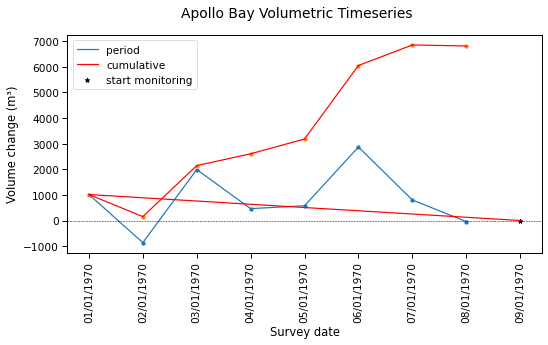

In [26]:
# single location plot
sb.set_context("paper", font_scale=1.2)
f,ax=plt.subplots(figsize=(8.5,4))

loc_in='mar' # the code of the location to be plotted

dataset=location_level_volumetrics.query(f"location=='{loc_in}'")

# Calculate the cumulative net volumetric change and mean elevation change from start of monitoring
dataset["cum"]=dataset.net_vol_change.cumsum()
dataset["cum_mec"]=dataset.norm_net_change.cumsum()



y=dates.date2num(dataset.date_post)
y_scatter=dates.date2num(dataset.date_pre)

ax=sb.lineplot(data=dataset, x="date_post", y="net_vol_change",label="period")
ax=sb.lineplot(data=dataset, x="date_post", y="cum",  color="r", label="cumulative")

ax=sb.scatterplot(data=dataset, x="date_post", y="net_vol_change")
ax=sb.scatterplot(data=dataset, x="date_post", y="cum")

x_start=np.array([dataset.iloc[0].date_pre,dataset.iloc[0].date_post])
y_start=np.array([0,dataset.iloc[0].cum])

ax.plot(x_start,y_start, c='r')
ax.scatter(dataset.iloc[0].date_pre,0, c='k', marker="*", label="start monitoring")

# the zero horizontal line
ax.axhline(0,c="k", ls="--",lw=0.5)

ax.set(xticks=np.append(dataset.date_pre.values,dataset.date_post.values[-1]))
ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m/%Y"))

plt.xticks(rotation=90)

# the plot x and y axis labels
ax.set_xlabel("Survey date")
ax.set_ylabel("Volume change (m³)")


# the title of the plot
f.suptitle("Apollo Bay Volumetric Timeseries")

plt.legend()


# Uncomment the below line if the image needs to be saved and replace the path.
# f.savefig(r'E:\mary\apo\apo_vol_timeseries.png', dpi=300, bbox_inches='tight')

##  Altimetric heatmaps and alongshore estimated volume changes
Here, we can display the alongshore estimated eroded/deposited volumes acrosse the surveyed beach.

__Note:__ The net volume change is estimated by sweeping the transect-specific value to the next transect.


In [27]:
# Set plot fonts style

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'

In [28]:
# Set plot fonts style
loc_in='mar' # the code of the location to be plotted

# quick way to create a list of periods from the location
dts=list(location_level_volumetrics.query(f"location=='{loc_in}'").dt.unique())

# or, manually enter the periods you want to plot
# dts=['dt_1'] 


C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_tr"] = df.tr_id.apply(lambda a: int(float(a)), convert_dtype=True)
C:\conda3\envs\sandpyper_env\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

Working on mar at dt_0


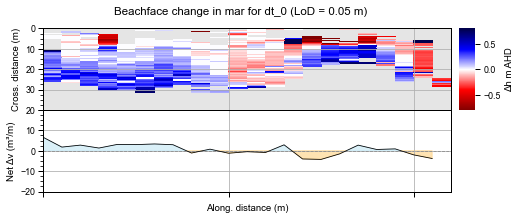

C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_tr"] = df.tr_id.apply(lambda a: int(float(a)), convert_dtype=True)
C:\conda3\envs\sandpyper_env\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

Working on mar at dt_1


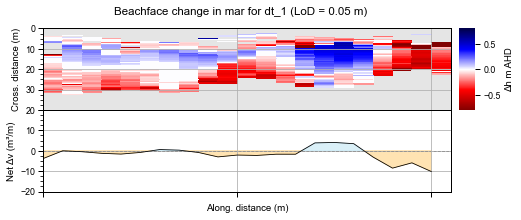

C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_tr"] = df.tr_id.apply(lambda a: int(float(a)), convert_dtype=True)
C:\conda3\envs\sandpyper_env\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

Working on mar at dt_2


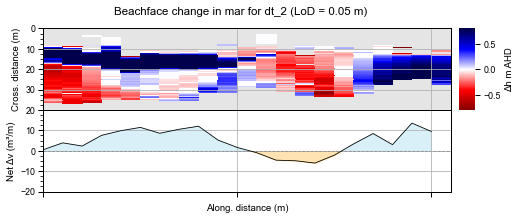

C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_tr"] = df.tr_id.apply(lambda a: int(float(a)), convert_dtype=True)
C:\conda3\envs\sandpyper_env\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

Working on mar at dt_3


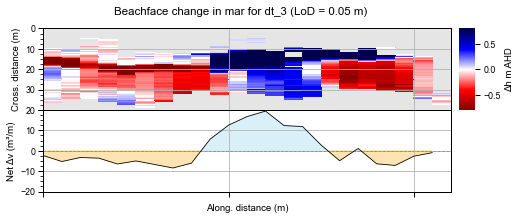

C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_tr"] = df.tr_id.apply(lambda a: int(float(a)), convert_dtype=True)
C:\conda3\envs\sandpyper_env\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

Working on mar at dt_4


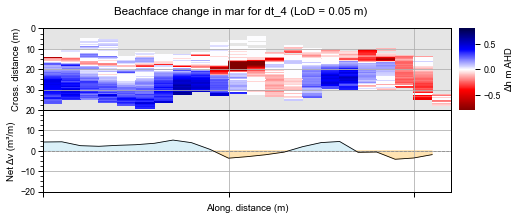

C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_tr"] = df.tr_id.apply(lambda a: int(float(a)), convert_dtype=True)
C:\conda3\envs\sandpyper_env\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

Working on mar at dt_5


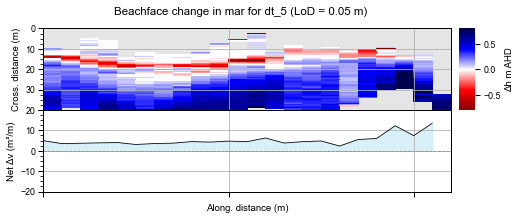

C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_tr"] = df.tr_id.apply(lambda a: int(float(a)), convert_dtype=True)
C:\conda3\envs\sandpyper_env\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

Working on mar at dt_6


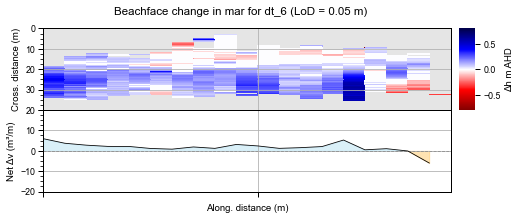

C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_tr"] = df.tr_id.apply(lambda a: int(float(a)), convert_dtype=True)
C:\conda3\envs\sandpyper_env\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\conda3\envs\sandpyper_env\lib\site-packages\sandpyper\volumetrics.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

Working on mar at dt_7


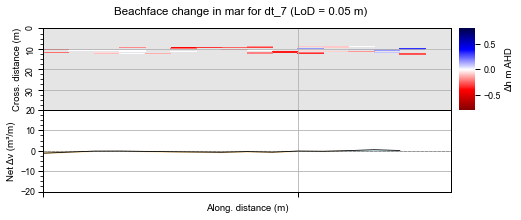

In [30]:
# PARAMETERS

sand_pts=sand_pts # the dh table
lod=0.05 # can be the LoD table path, a numeric value or False, which will not use LoDs filter.
return_data= True # wether or not (True or False) create a dataframe with summary info
full_specs_table=False # provide the details table path or set to False to not use it
mode="subset" # if 'subset', only the provided location_subset and dt_subset will be plotted. If 'all', plot all.
location_subset=['mar']
dt_subset=dts
y_heat_bottom_limit=40
ax2_y_lims=[-20,20]
save=False
save_path=r'E:\\mary\\wbl\\' # specify the folder where the plots need to be saved


# FUNCTION

data=new_plot_alongshore_change(sand_pts=sand_pts,
                           lod=lod,
                           return_data=return_data,
                           full_specs_table=full_specs_table,
                           mode=mode,
                           location_subset=location_subset,
                           dt_subset=dt_subset,
                           y_heat_bottom_limit=y_heat_bottom_limit,
                           ax2_y_lims=ax2_y_lims,
                           save=save,
                           save_path=save_path)

##  Multilocation MEC timeseries

In [31]:
# sort the location codes. These will appear from right to left in the x-axis of the plot

volumetrics=location_level_volumetrics

loc_order=["mar","leo"]

sorterIndex = dict(zip(loc_order,range(len(loc_order))))
volumetrics['loc_rank']=volumetrics['location'].map(sorterIndex)
volumetrics.sort_values(["loc_rank"], inplace=True)

# [OPTIONAL] replace long location names with shorter versions
volumetrics.replace("St. Leonards","St. Leo.", inplace=True)

# volumetrics=pd.merge(volumetrics,locs_dt_str[["loc_code","loc_full"]], left_on='location',right_on='loc_code', how='left')

volumetrics.query("location=='leo'")

,location,dt,abs_in,abs_out,abs_net_change,mec_m,norm_in,norm_out,norm_net_change,tot_vol_depo,tot_vol_ero,net_vol_change,location_m3_m,n_obs_valid,date_pre,date_post,n_days,loc_full,loc_rank
8,leo,dt_0,49.940494,-93.281541,-43.341047,-0.086682,0.043540,-0.081327,-0.037786,191.615168,-315.671904,-124.056736,-0.248113,1147,2018-06-06,2018-07-13,37,St. Leo.,1
9,leo,dt_1,18.041838,-69.788966,-51.747128,-0.103494,0.026377,-0.102031,-0.075654,58.583664,-212.974671,-154.391007,-0.308782,684,2018-07-13,2018-07-25,12,St. Leo.,1
10,leo,dt_2,55.697040,-17.551412,38.145628,0.076291,0.076402,-0.024076,0.052326,145.882641,-68.026152,77.856489,0.155713,729,2018-07-25,2018-09-20,57,St. Leo.,1
11,leo,dt_3,104.914413,-15.113458,89.800955,0.179602,0.086994,-0.012532,0.074462,260.625490,-55.978942,204.646548,0.409293,1206,2018-09-20,2019-02-11,144,St. Leo.,1
12,leo,dt_4,67.482539,-65.819504,1.663035,0.003326,0.054730,-0.053382,0.001349,198.928602,-154.804965,44.123637,0.088247,1233,2019-02-11,2019-03-28,45,St. Leo.,1
13,leo,dt_5,29.572976,-242.492726,-212.919750,-0.425840,0.019379,-0.158907,-0.139528,64.199757,-581.772138,-517.572381,-1.035145,1526,2019-03-28,2019-07-31,125,St. Leo.,1


x_diff provided: mar found in {'mar': [-1, 1]}. Setting xlims= (-1, 1) 
x_diff provided: leo not found in {'mar': [-1, 1]}. Setting xlims= [-0.3, 0.3] 


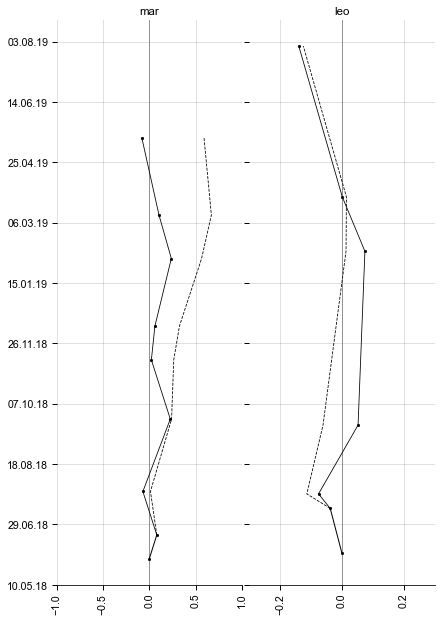

In [137]:
x_diff={"mar":[-1,1]}

plot_mec_evolution(volumetrics,
                   loc_order=["mar","leo"],
                   scale_mode='equal',
                   x_diff=x_diff,
                   x_limits=[-0.3,0.3],
                   font_scale=1.2,
                   location_field='location',
                   figure_size=(6,8.5))